### Dicionário de dados , variável continua, descritiva ou qualitativa

country, Nome do país <span style="color: red;">index</span>

child_mort, Morte de crianças menores de 5 anos de idade por 1000 nascidos vivo, <span style="color: green;">variável contínua</span>

exports, Exportações de bens e serviços per capita. Dado como % do PIB per capita, <span style="color: green;">variável contínua</span>

health, Gastos totais com saúde per capita. Dado como % do PIB per capita, <span style="color: green;">variável contínua</span>

imports, Importações de bens e serviços per capita. Dado como % do PIB per capita, <span style="color: green;">variável contínua</span>

Income, Renda líquida por pessoa, <span style="color: green;">variável contínua</span>

Inflation, A medição da taxa anual de crescimento do PIB Total, <span style="color: green;">variável contínua</span>

life_expec, O número médio de anos que uma criança recém-nascida viveria se os padrões atuais de mortalidade permanecessem os mesmos, <span style="color: green;">variável contínua</span>

total_fer, O número de filhos que nasceriam para cada mulher se as taxas atuais de fertilidade por idade permanecessem as mesmas. <span style="color: green;">variável contínua</span>

gdpp, O PIB per capita. Calculado como o PIB Total dividido pela população total. <span style="color: green;">variável contínua</span>

### importando as libs básicas e setando padrões de visualização gráfica

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
sns.set_context("talk")
data = pd.read_csv("E:\INFNET\Aprendizado-N-Supervisionado-INFNET\data\\raw\Country-data.csv")

In [2]:
data = data.set_index("country")

data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [3]:
import numpy as np

#data_log = np.log(data)

In [8]:
!pip install -U scikit-learn

In [9]:
!pip install yellowbrick

In [10]:
!pip install scipy

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DistanceMetric

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [13]:
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [14]:
!pip freeze 

asttokens==2.2.1
backcall==0.2.0
colorama==0.4.6
comm==0.1.3
contourpy==1.0.7
cycler==0.11.0
debugpy==1.6.7
decorator==5.1.1
executing==1.2.0
fonttools==4.39.4
ipykernel==6.23.1
ipython==8.14.0
jedi==0.18.2
joblib==1.2.0
jupyter_client==8.2.0
jupyter_core==5.3.0
kiwisolver==1.4.4
matplotlib==3.7.1
matplotlib-inline==0.1.6
nest-asyncio==1.5.6
numpy==1.24.3
packaging==23.1
pandas==2.0.2
parso==0.8.3
pickleshare==0.7.5
Pillow==9.5.0
platformdirs==3.5.1
prompt-toolkit==3.0.38
psutil==5.9.5
pure-eval==0.2.2
Pygments==2.15.1
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2023.3
pywin32==306
pyzmq==25.1.0
scikit-learn==1.2.2
scipy==1.10.1
seaborn==0.12.2
six==1.16.0
stack-data==0.6.2
threadpoolctl==3.1.0
tornado==6.3.2
traitlets==5.9.0
tzdata==2023.3
wcwidth==0.2.6
yellowbrick==1.5


###
atualizando o requirements

In [15]:
import os

os.system('pip freeze > requirements.txt')

0

### tendo uma idéia das proporções dos dados e suas variações, para saber se temos que fazer maiores tratamentos no modelo ( pca)

In [16]:
Descricao = data.describe()
Descricao

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,38.112651,41.355964,6.844880,47.172289,17225.560241,7.786301,70.578313,2.951205,13036.301205
std,40.399466,27.307931,2.729044,24.006006,19307.963264,10.602530,8.915258,1.517847,18360.363003
min,2.600000,2.200000,1.810000,11.800000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.075000,23.800000,4.940000,30.475000,3347.500000,1.790000,65.300000,1.792500,1357.500000
50%,19.250000,35.200000,6.325000,43.300000,10180.000000,5.265000,73.150000,2.395000,4670.000000
75%,61.200000,51.375000,8.625000,58.825000,22850.000000,10.825000,76.800000,3.895000,14325.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Text(0.5, 1.0, 'Mapa de correlações')

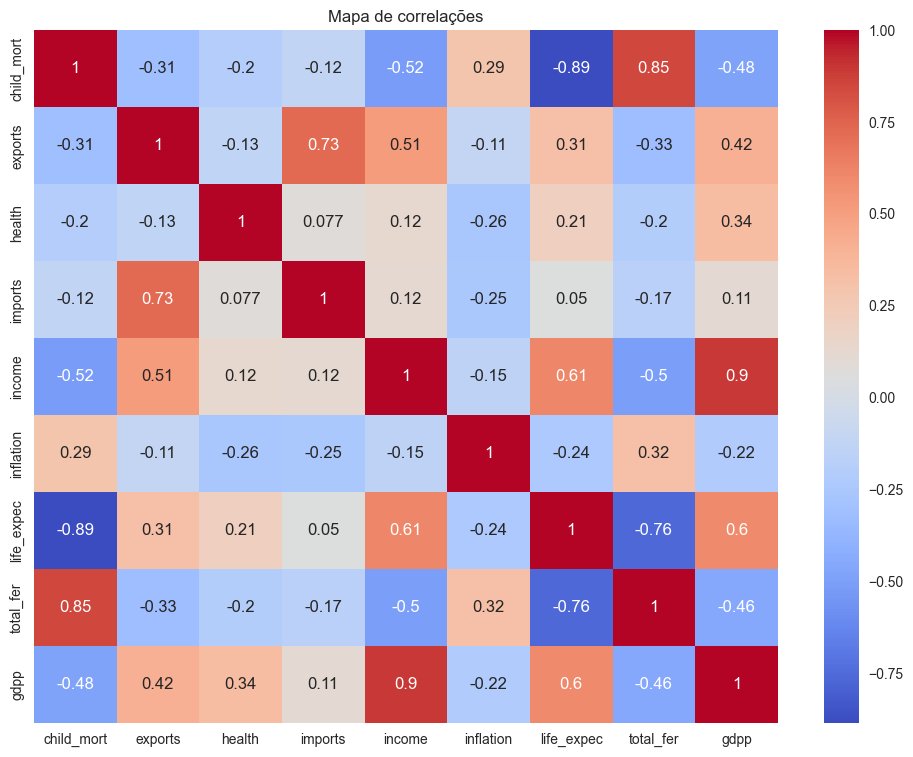

In [17]:

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(data.corr(), cmap = 'coolwarm', annot = True)
ax.set_title('Mapa de correlações')

In [18]:
scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data),
                           columns=data.columns,
                           index=data.index)



### base escalonada

In [19]:
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.293209,-1.151711,0.270184,-0.094941,-0.811210,0.156444,-1.617656,1.895761,-0.681962
Albania,-0.534110,-0.490567,-0.108379,0.059653,-0.378996,-0.311838,0.643728,-0.859864,-0.488736
Algeria,-0.268453,-0.108573,-0.983118,-0.659002,-0.224708,0.786497,0.666229,-0.040445,-0.468523
Angola,2.008247,0.769279,-1.468268,-0.178506,-0.588349,1.382492,-1.178880,2.120441,-0.519329
Antigua and Barbuda,-0.690524,0.152211,-0.299499,0.490011,0.097375,-0.600376,0.699981,-0.542670,-0.045687
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221281,0.192614,-0.586178,0.230960,-0.741598,-0.488745,-0.852611,0.362656,-0.549922
Venezuela,-0.521696,-0.472202,-0.711141,-1.235598,-0.037692,3.605651,0.542472,-0.317990,0.025332
Vietnam,-0.367764,1.125562,-0.001793,1.379973,-0.661597,0.408087,0.283706,-0.661618,-0.640607


### criando uma mascara para ocultar a parte superior.

In [20]:
def mask(DF):
    mask = np.triu(np.ones_like(DF, dtype=bool)) 
    return mask

Text(0.5, 1.0, 'Mapa de correlações- escalonada')

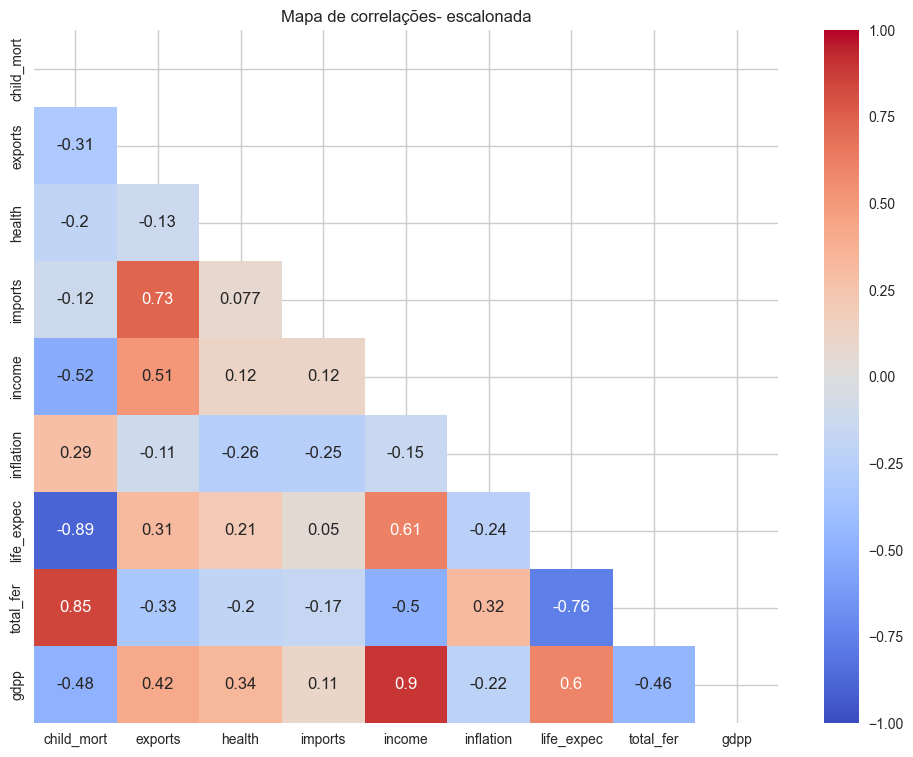

In [21]:

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(scaled_data.corr(), cmap = 'coolwarm', annot = True,vmax= 1, vmin= -1, mask= mask(scaled_data.corr()) )
ax.set_title('Mapa de correlações- escalonada')

### Agora vamos fazer uma clusterização com a base escalonada , 3 clusters, e model kmeans


In [27]:
model = KMeans(
    n_clusters=3,
    n_init=100, 
    max_iter=10000, 
    random_state=42
)

model.fit(scaled_data)

clusters = model.predict(scaled_data)


data['cluster'] = clusters

data

C:\Users\Diones\AppData\Local\Temp\ipykernel_24216\3049638497.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusters


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0


### Plotando os gráficos scatter com todas as variáveis x income, quero saber as relações entre elas, com os clusters  realçados.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


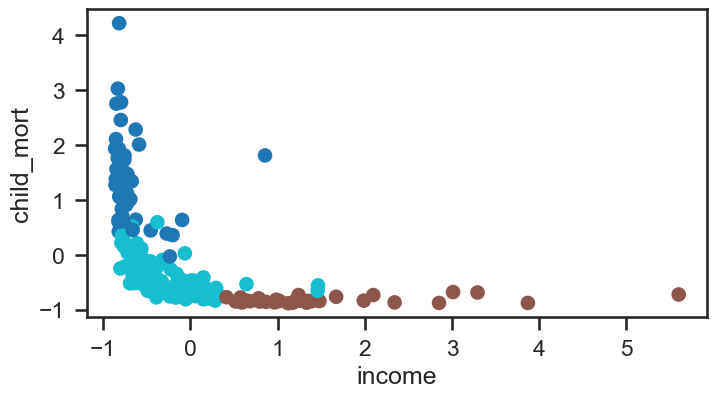

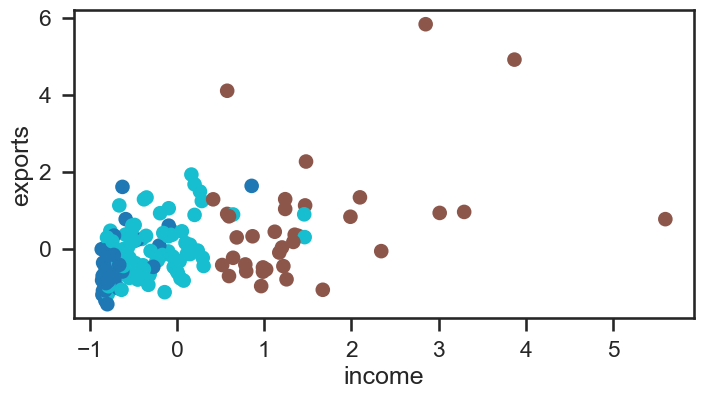

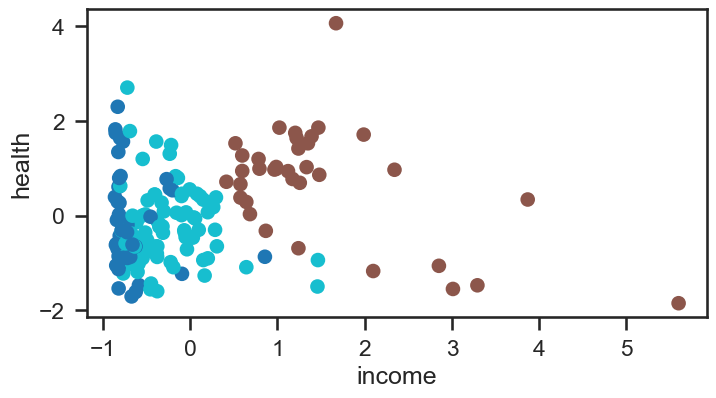

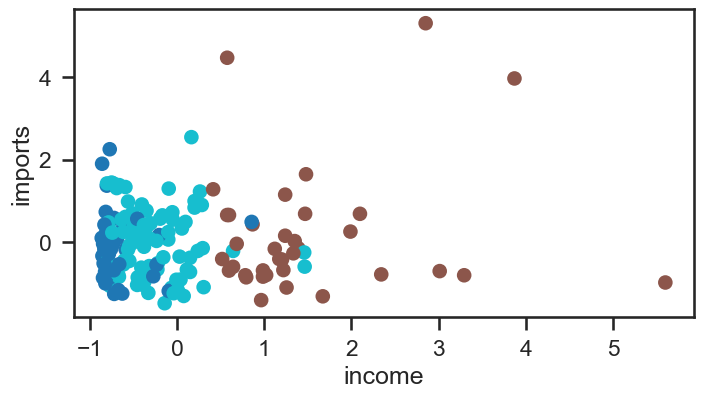

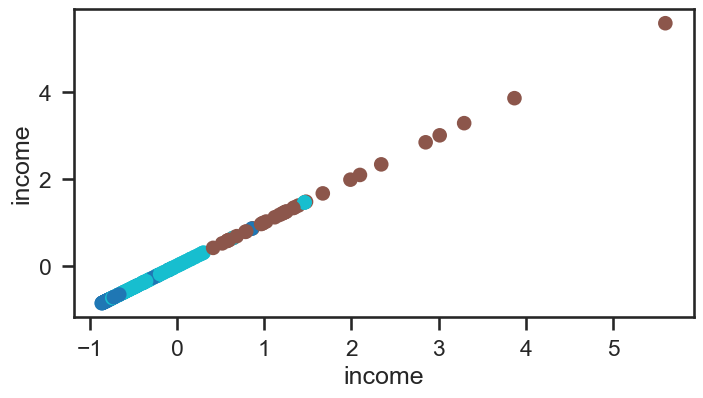

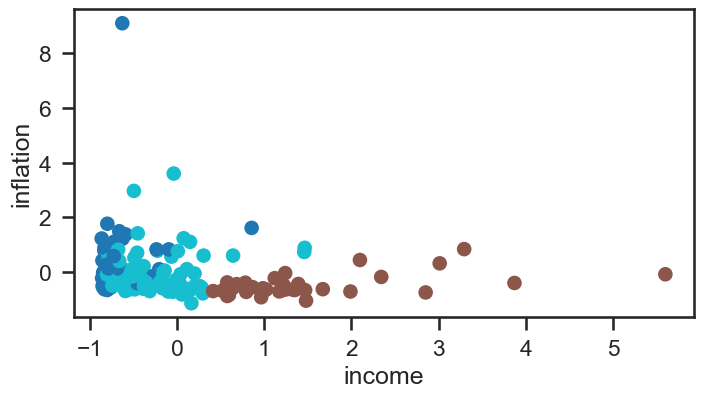

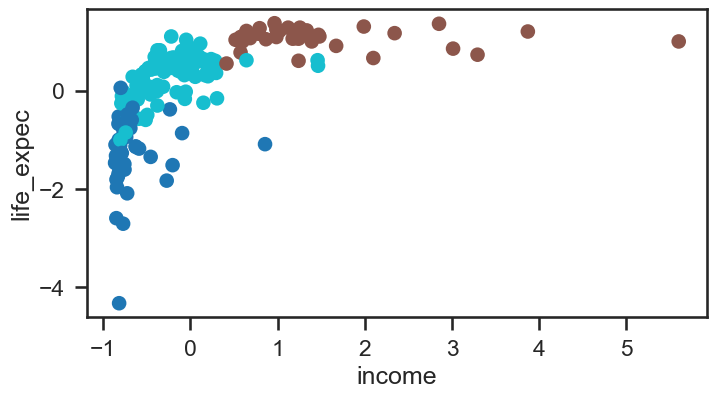

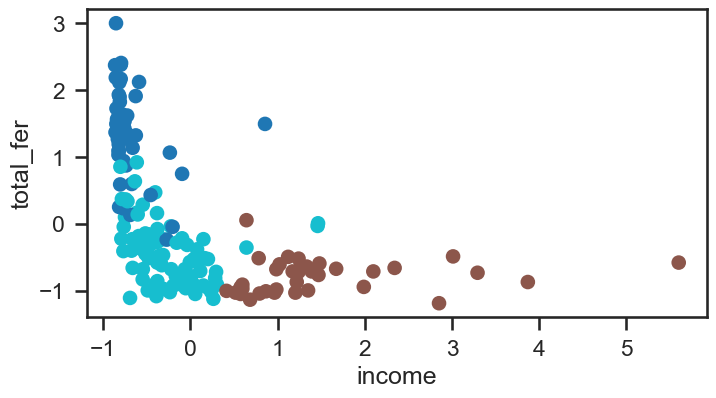

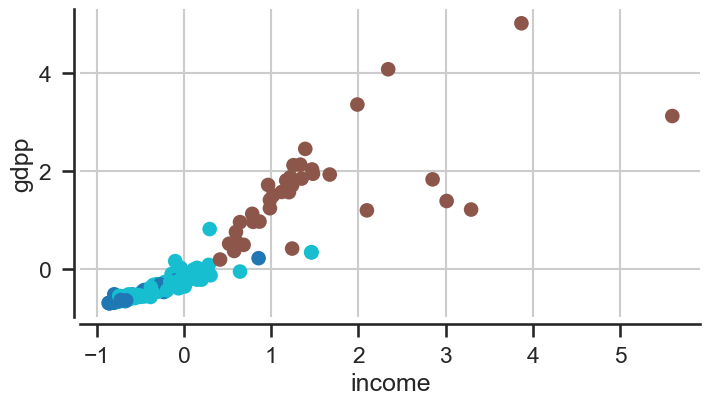

In [146]:

for coluna in scaled_data.columns:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.scatter(scaled_data["income"],
    scaled_data[coluna],
    c=clusters, cmap='tab10')
    ax.set_xlabel("income")
    ax.set_ylabel(coluna)        

ax.grid(True)
ax.legend()
sns.despine(offset=5)

### Os gráficos acima mostram que algumas das variáveis podem sim ter uma separação de modo que tenhamos uma clusterização mais efetiva, child mort, live expec e total fer, essas 3 versus income, mostraram uma certa divisão, porém com muito ruído.
### Logo vou aplicar uma PCA para reduzir essa dimensionalidade e tentar encontrar melhores distribuições.


In [40]:
!pip install rogeriopradoj-paretochart

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for rogeriopradoj-paretochart: filename=rogeriopradoj_paretochart-2.0.0-py3-none-any.whl size=6387 sha256=65973bd92cb6f2b2bf739da39a7ac003249749c12fc60e9a627c2f1a3a5f2cc3
  Stored in directory: c:\users\diones\appdata\local\pip\cache\wheels\51\c6\13\cdf06f27aa0079e91b63781208177fc9656f375eb5eac66aa4
Successfully built rogeriopradoj-paretochart


### Na fase de Análise dos dados, vimos a correlação, e com isso temos uma situação que algumas variáveis são muito correlatas, porém a maioria é média em correlação. então busquei uma PCA menos agressiva em relação a quantidade de componentes, para que não tenha perda significativa, temos aqui com 5 componentes a representação de 95% da base. vamos usar essa amostragem.

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from paretochart import pareto

pca = PCA(n_components=5)
data_pca = pca.fit_transform(scaled_data)

e:\INFNET\.venv\Lib\site-packages\paretochart\paretochart.py:198: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yt)


(<Figure size 800x550 with 2 Axes>, <Axes: >, <Axes: >)

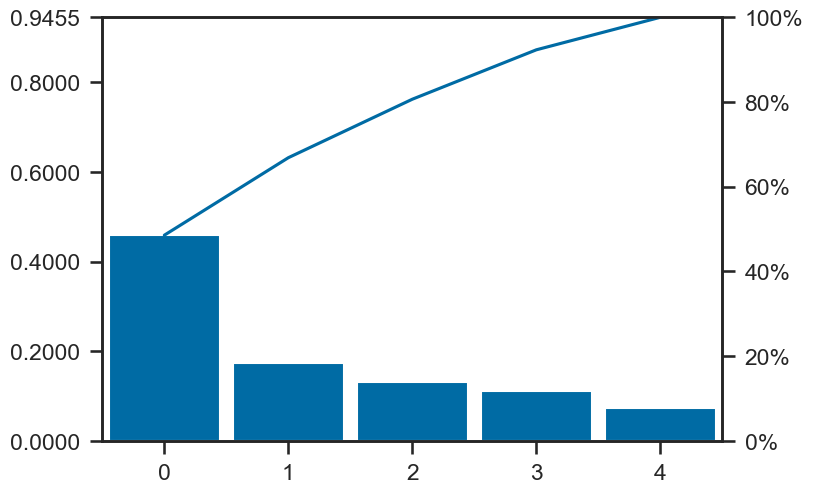

In [57]:
pareto(pca.explained_variance_ratio_)

In [71]:
df_pca = pd.DataFrame(data_pca)

,0,1,2,3,4
0,-2.924568,0.030175,-0.692482,0.999690,-0.156276
1,0.420630,-0.573643,-0.331441,-1.177530,0.139816
2,-0.292594,-0.418321,1.231680,-0.910644,0.109713
3,-2.940940,1.693968,1.516179,0.843442,-0.267365
4,1.022475,0.153492,-0.236556,-0.841047,-0.214329
...,...,...,...,...,...
161,-0.829932,0.642386,-0.402890,-0.688007,-0.414456
162,-0.558515,-1.198009,3.138161,-0.241818,2.033859
163,0.486130,1.401139,-0.281662,-1.060395,1.169571
164,-1.896484,-0.112488,1.128543,0.006905,0.587345


### Fazendo a cluesterização com kmeans usando a PCA

In [178]:
model = KMeans(
    n_clusters=3,
    n_init=100, 
    max_iter=10000, 
    random_state=42
)

model.fit(data_pca)

clusters_pca = model.predict(data_pca)


data['cluster_pca'] = clusters_pca

data

C:\Users\Diones\AppData\Local\Temp\ipykernel_24216\248195165.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_pca'] = clusters_pca


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_pca,cluster_pca2,cluster_pca3
country,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0,0,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2,2,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2,2,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2,2,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2,2,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2,2,2


In [90]:
centroid_pca = model.cluster_centers_

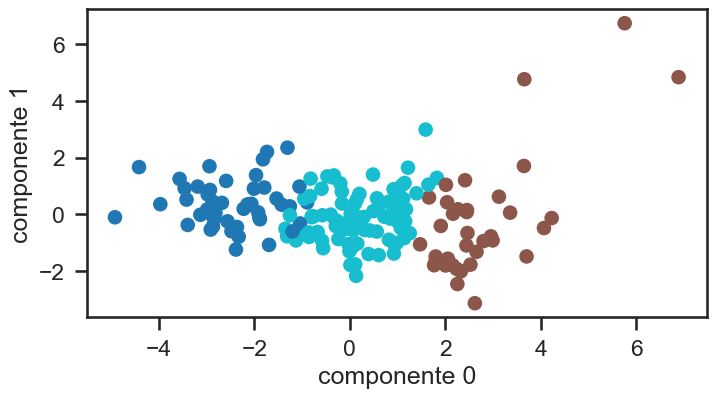

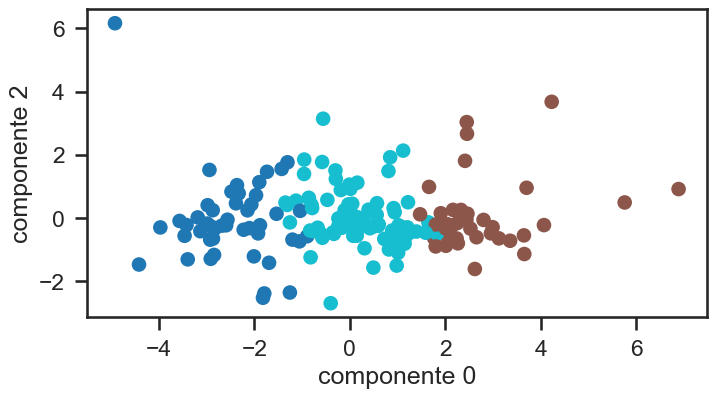

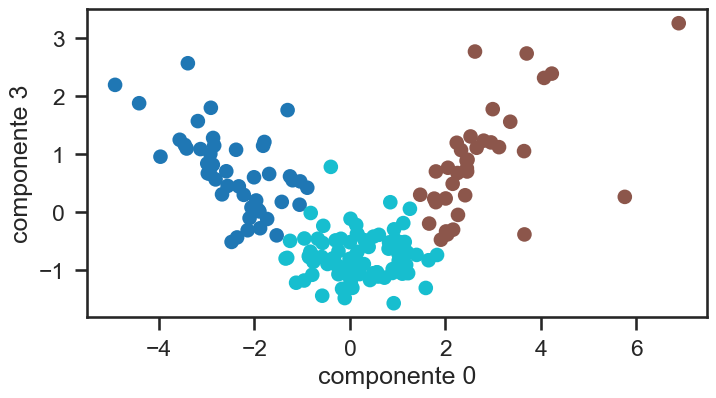

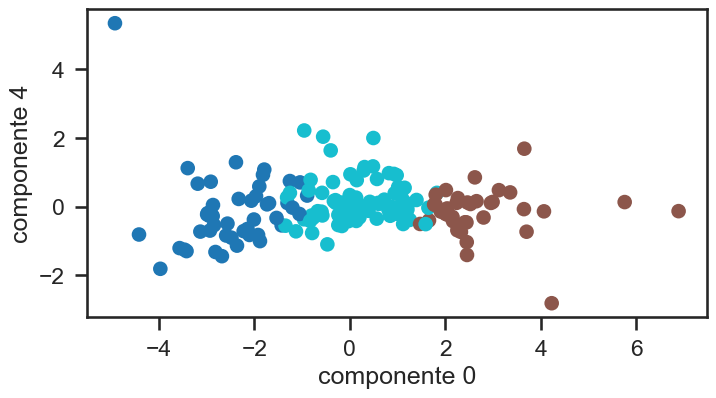

In [78]:
ln = [1,2,3,4]
for n in ln:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    ax.scatter(data_pca[:, 0],
    data_pca[:, n],
    c=clusters_pca, cmap='tab10')  
    ax.set_xlabel("componente 0")
    ax.set_ylabel(f'componente {n}')   

### Como visto acima, as componentes ficaram muito mais fáceis de serem separadas e com menos ruídos.

In [79]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_pca
country,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2
...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2


### para encontrar os Países que melhor representa os clusters, eu usei o método cluster_centers_ para determinar os centroides e busquei os indices mais próximos do meu centroide. QUE SÃO ZAMBIA, ICELAND E SURINAME, VEJA O ARQUIVO MODEL_BASE_PAÍSES PARA VER O COMO CALCULADO.

In [148]:
def encontrar_ponto_proximo(data, centroids):
    ponto_proximo = np.zeros(centroids.shape[0], dtype=int)
    for i, centroid in enumerate(centroids):
        distances = np.linalg.norm(data - centroid, axis=1)
        ponto_proximo[i] = np.argmin(distances)
    return ponto_proximo

In [105]:
ponto =encontrar_ponto_proximo(data_pca, centroid_pca)
print(ponto)

[165  68 142]


In [111]:
data_idx = data.reset_index()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
162,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2
163,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2
164,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2,0


In [122]:

for i, point_index in enumerate(ponto):
    print(f"Centróide {i} está mais próximo do País : {data_idx.loc[point_index]}  ")

Centróide 0 está mais próximo do País : country        Zambia
child_mort       83.1
exports          37.0
health           5.89
imports          30.9
income           3280
inflation        14.0
life_expec       52.0
total_fer         5.4
gdpp             1460
cluster             2
cluster_pca         0
Name: 165, dtype: object  
Centróide 1 está mais próximo do País : country        Iceland
child_mort         2.6
exports           53.4
health             9.4
imports           43.3
income           38800
inflation         5.47
life_expec        82.0
total_fer          2.2
gdpp             41900
cluster              1
cluster_pca          1
Name: 68, dtype: object  
Centróide 2 está mais próximo do País : country        Suriname
child_mort         24.1
exports            52.5
health             7.01
imports            38.4
income            14200
inflation           7.2
life_expec         70.3
total_fer          2.52
gdpp               8300
cluster               0
cluster_pca           2

### Clusterização Hierarquica -   usando o method ward, que é o que separa melhor os clusters nessa base. 

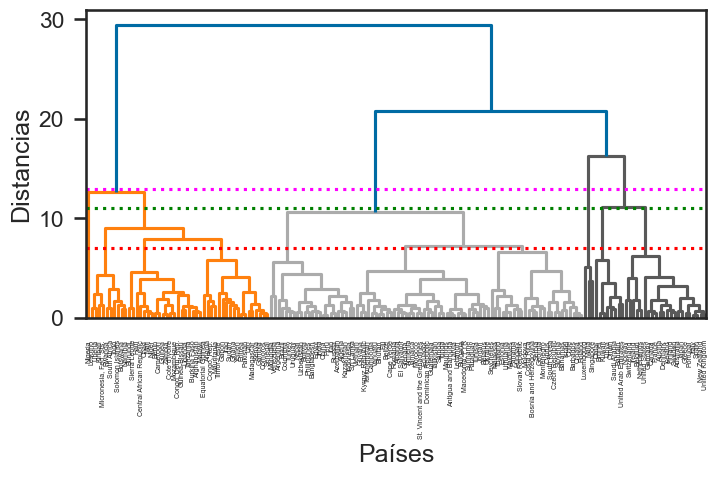

In [145]:
import scipy.cluster.hierarchy as sch


distance_threshold = 13
distance_threshold1 = 7
distance_threshold2 = 11


plt.style.use('tableau-colorblind10')
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

linkage = sch.linkage(data_pca, method="ward")
dendrogram = sch.dendrogram(linkage, labels=scaled_data.index, leaf_rotation=90)

ax.set_xlabel('Países')
ax.set_ylabel('Distancias')
ax.axhline(distance_threshold, color='magenta', ls=":")
ax.axhline(distance_threshold1, color='red', ls=":")
ax.axhline(distance_threshold2, color='green', ls=":")

### Interpretação do Dendograma

O dendograma da clusterização hierarquica mostra a estrutura dos clusters e como eles se relacionam. temos claramente que nossa hierarquia se divide em 2 etapas em uma dessas etapas temos um cluster definido pela cor Laranja, esse grupo laranja tem um Threshold ligeralmente abaixo de 13, esses são os países mais pobres e com piores ínices. Os países com índices medianos e bons, tem algumas coisas em comum.  Temos claramente que por volta do Threshold 11(green) temos 2 grupos muito parecidos, porém se difere na segunda ramificação da arvore. 

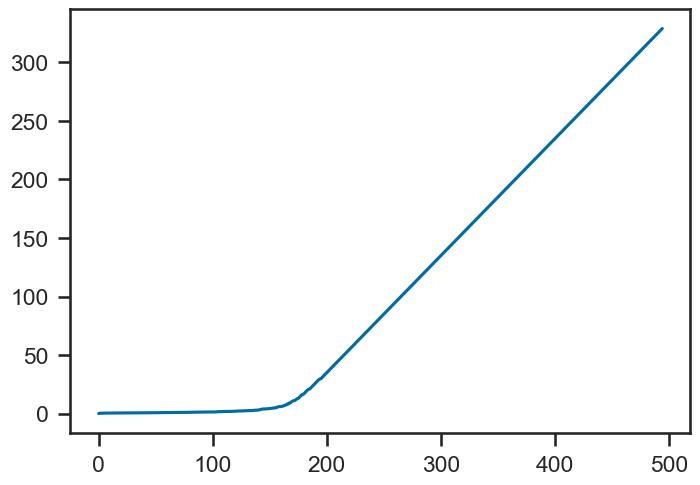

In [137]:
plt.plot(np.unique(linkage))

### Comparando os resultados dos modelos

O Kmeans após aplicada uma PCA para redução de dimensionalidade, ele ficou mais eficiente na questão de separar de forma mais efetiva as variáveis.

Temos a facilidade de mostrar as componentes da PCA 1 vs a outra, isso facilita a verificação e a obtenção de informação para saber como a classificação poderá ocorrer componente a componente. 

Na Hierarquica temos um pouco mais enrigecido, pois ela cria as ramificações, e mesmo que tenhamos distancias iguais dentro de alguns nós , pode ser diferentes clusters pois um nó superior é dividido por alguma componente. isso pode restringir as divisões que queremos fazer e até possiveis reduções de dimensionalidade, pois se as componentes quando plotadas ficarem altamente correlacionadas, temos sim uma possibilidade de ampliar nossa PCA.

A Clusterirzação Hirarquica nos da uma visão de como poderá ser feito, uma panorama da estrutura dos dados e relações, com elas temos a possibilidade de fazer uma clusterização pelo Kmeans de forma mais eficiente. Logo eu entendo como a hierarquica como um passo para entender os dados e o kmeans para começar a classificar efeticamente os dados.
 

### escolha de algoritmos ....

resposta 
 
* O kmeans funciona selecionando de forma aleatória um centroide. A quantidade de centroide é indicada por nós quando passamos o n_cluster.
* Depois de atribuir o N número de centroides , ele faz uma verificação entre as médias das distancias entre os pontos do cluester e o centroide. Atualizando os centroides para ser o centro do cluster.
* Essa etapa acima de atribuir um centroide, calcular a distância e atualizar a posição é repetida inúmeras vezes ou até atingir o máximo de interaçõs que desejamos.
* A convergencia se da quando o centroide atribuido não se move mais quando temos a verificação das distancias pelas médias. Ou seja O algoritimo encontrou uma relação que melhor separa os dados de forma a ficar mais equilibrado em relação a distancia do ponto central do cluster e os pontos do cluester.
* o algoritmo kmeans é sensível a outliers ?  SIM , muito sensível pois os cálculos de distancia levam em consideração esses pontos fora da curva, e assim podem fazer que o centroide se desloque mais do que deveria. 
* por que o DBSscan é melhor a presença de outliers ?  Ele é melhor pois é capaz de identificar esses pontos fora da curva e ruídos , ele é sensível a densidade de pontos e não ao valor do ponto, com isso fica mais plausível o seu uso. Outra questão é a complexidade de formas de organizar os clusters, o kmeans usa centroide e distancia em relação a ele, isso significa que ele organiza de forma esférica onde vai ter um ponto central e um raio onde os dados serão classificados como dentro do cluster. 


### Fazendo as Alterações no algoritmo do kmeans para usar o medoide.

In [151]:
centroids = model.cluster_centers_

### preciso definir funções para achar o medoid

In [154]:
def find_medoid(cluster, centroid):
    min_distance = float('inf')
    medoid = None
    for point in cluster:
        dist = distance(point, centroid)
        if dist < min_distance:
            min_distance = dist
            medoid = point
    return medoid

In [158]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [159]:
centroids = data_pca[np.random.choice(range(len(data_pca)), 3, replace=False)]

In [167]:
from sklearn.metrics.pairwise import euclidean_distances

for _ in range(10000):
    
    clusters = [[] for _ in range(3)]
    for point in data_pca:
        distances = euclidean_distances([point], centroids)
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(point)

        new_centroids = []
    for cluster in clusters:
        centroid = np.mean(cluster, axis=0)
        medoid = find_medoid(cluster, centroid)
        new_centroids.append(medoid)

    
    if np.array_equal(centroids, new_centroids):
        break

    centroids = new_centroids

In [168]:
model = KMeans(n_clusters=3, init=centroids, n_init=1, max_iter=10000, random_state=42)


In [173]:
model.fit(data_pca)
clusters_mediode = model.labels_

In [179]:
clusters_pca = model.predict(data_pca)
data['cluster_mediode'] = clusters_mediode

C:\Users\Diones\AppData\Local\Temp\ipykernel_24216\2507586341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster_mediode'] = clusters_mediode


In [182]:
data = data.drop(['cluster_pca2','cluster_pca3'], axis =1)

### data set final com os dados e as colunas com seus respectivos clusters feito pelo scaled_data = cluster, pelo pca = cluster pca e pelo pca com medoide, cluster medoide.

In [183]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_pca,cluster_mediode
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2,2
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2,2
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2,2
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,2,2
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2,2
